In [2]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn import tree
# import xgboost as xgb

In [3]:
data = pd.read_csv("C:\\Users\\sande\\Desktop\\ML_Project\\chennai_housePrice02.csv")
pd.set_option('display.max_columns', None)
data.head(3)

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0         1.0       3  AbNormal        Yes  15-05-1967  Commercial   
1         1.0       5  AbNormal         No  22-12-1995  Commercial   
2         1.0       3  AbNormal        Yes  09-02-1992  Commercial   

  UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0        AllPub   Paved      A       4.0          3.9         4.9       4.330   
1        AllPub  Gravel     RH       4.9          4.2         2.5       3.765   
2           ELO  Gravel     RL       4.1          3.8         2.2       3.090   

   REG_FEE  COMMIS  SALES_PRICE  
0   380000  144400      7600000  
1   760122  304049     21717770  
2   421094   92114     13159200

In [4]:
# Removing all the null values
data.dropna(inplace=True)

# Renaming all the column names in lowercase letters
data.columns = data.columns.str.lower()


# Renaming all the string in area column names in lowercase letters
data.area = data.area.str.lower()

# Correcting the spelling mistakes in area columns
data.area = data.area.replace({'velchery':'velachery', 
                       'kknagar':'kk nagar', 
                       'tnagar':'t nagar', 
                       'chormpet':'chrompet', 
                       'chrompt':'chrompet', 
                       'chrmpet':'chrompet', 
                       'ana nagar':'anna nagar', 
                       'ann nagar':'anna nagar',
                       'karapakam':'karapakkam', 
                       'adyr':'adyar'})


# Renaming all the string in sale_cond column names in lowercase letters
data.sale_cond = data.sale_cond.str.lower()

# Correcting the spelling mistakes in sale_cond columns
data.sale_cond = data.sale_cond.replace({'adj land':'adjland', 
                       'normal sale':'normal sale',
                       'partiall':'partial',
                       'ab normal':'abnormal'})


# Renaming all the string in park_facil column names in lowercase letters
data.park_facil = data.park_facil.str.lower()

# Correcting the spelling mistakes in park_facil columns
data.park_facil = data.park_facil.replace({'noo':'no'})


# Renaming all the string in buildtype column names in lowercase letters
data.buildtype = data.buildtype.str.lower()

# Correcting the spelling mistakes in buildtype columns
data.buildtype = data.buildtype.replace({'comercial':'commercial', 
                       'others':'other'})


# Renaming all the string in utility_avail column names in lowercase letters
data.utility_avail = data.utility_avail.str.lower()

# Correcting the spelling mistakes in utility_avail columns
data.utility_avail = data.utility_avail.replace({'all pub':'allpub',
                                             'nosewr':'nosewa'})
                                            
                                            
# Renaming all the string in street column names in lowercase letters
data.street = data.street.str.lower()

# Correcting the spelling mistakes in street columns
data.street = data.street.replace({'pavd':'paved', 
                       'noaccess':'no access'})


# Renaming all the string in mzzone column names in lowercase letters
data.mzzone = data.mzzone.str.lower()

# Fixing the correct Data Type of columns
data.n_bedroom = data.n_bedroom.astype(int)
data.n_bathroom = data.n_bathroom.astype(int)

# Correcting Date columnd from object to daterime format
data.date_sale = pd.to_datetime(data.date_sale, format='%d-%m-%Y')
data.date_build = pd.to_datetime(data.date_build, format='%d-%m-%Y')

# Creating property_age column which deternine how old the property id
data['property_age'] = pd.DatetimeIndex(data.date_sale).year - pd.DatetimeIndex(data.date_build).year

# Creating total_price column by adding 'reg_fee', 'commis', 'sales_price' columns
data['total_price'] = pd.DataFrame(data.reg_fee	+ data.commis	+ data.sales_price)

# Rearranging the columns of dataframe 
data = data.reindex(columns = ['prt_id', 'area', 'sale_cond', 'park_facil',
       'buildtype', 'utility_avail', 'street', 'mzzone', 
       'date_build', 'date_sale', 'property_age', 
       'int_sqft', 'dist_mainroad', 'n_bedroom','n_bathroom', 'n_room', 
       'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 
       'reg_fee', 'commis', 'sales_price', 'total_price'])

data.head(3)

prt_id        area sale_cond park_facil   buildtype utility_avail  street  \
0  P03210  karapakkam  abnormal        yes  commercial        allpub   paved   
1  P09411  anna nagar  abnormal         no  commercial        allpub  gravel   
2  P01812       adyar  abnormal        yes  commercial           elo  gravel   

  mzzone date_build  date_sale  property_age  int_sqft  dist_mainroad  \
0      a 1967-05-15 2011-05-04            44      1004            131   
1     rh 1995-12-22 2006-12-19            11      1986             26   
2     rl 1992-02-09 2012-02-04            20       909             70   

   n_bedroom  n_bathroom  n_room  qs_rooms  qs_bathroom  qs_bedroom  \
0          1           1       3       4.0          3.9         4.9   
1          2           1       5       4.9          4.2         2.5   
2          1           1       3       4.1          3.8         2.2   

   qs_overall  reg_fee  commis  sales_price  total_price  
0       4.330   380000  144400      7600000      8124400  
1       3.765   760122  304049     21717770     22781941  
2       3.090   421094   92114     13159200     13672408

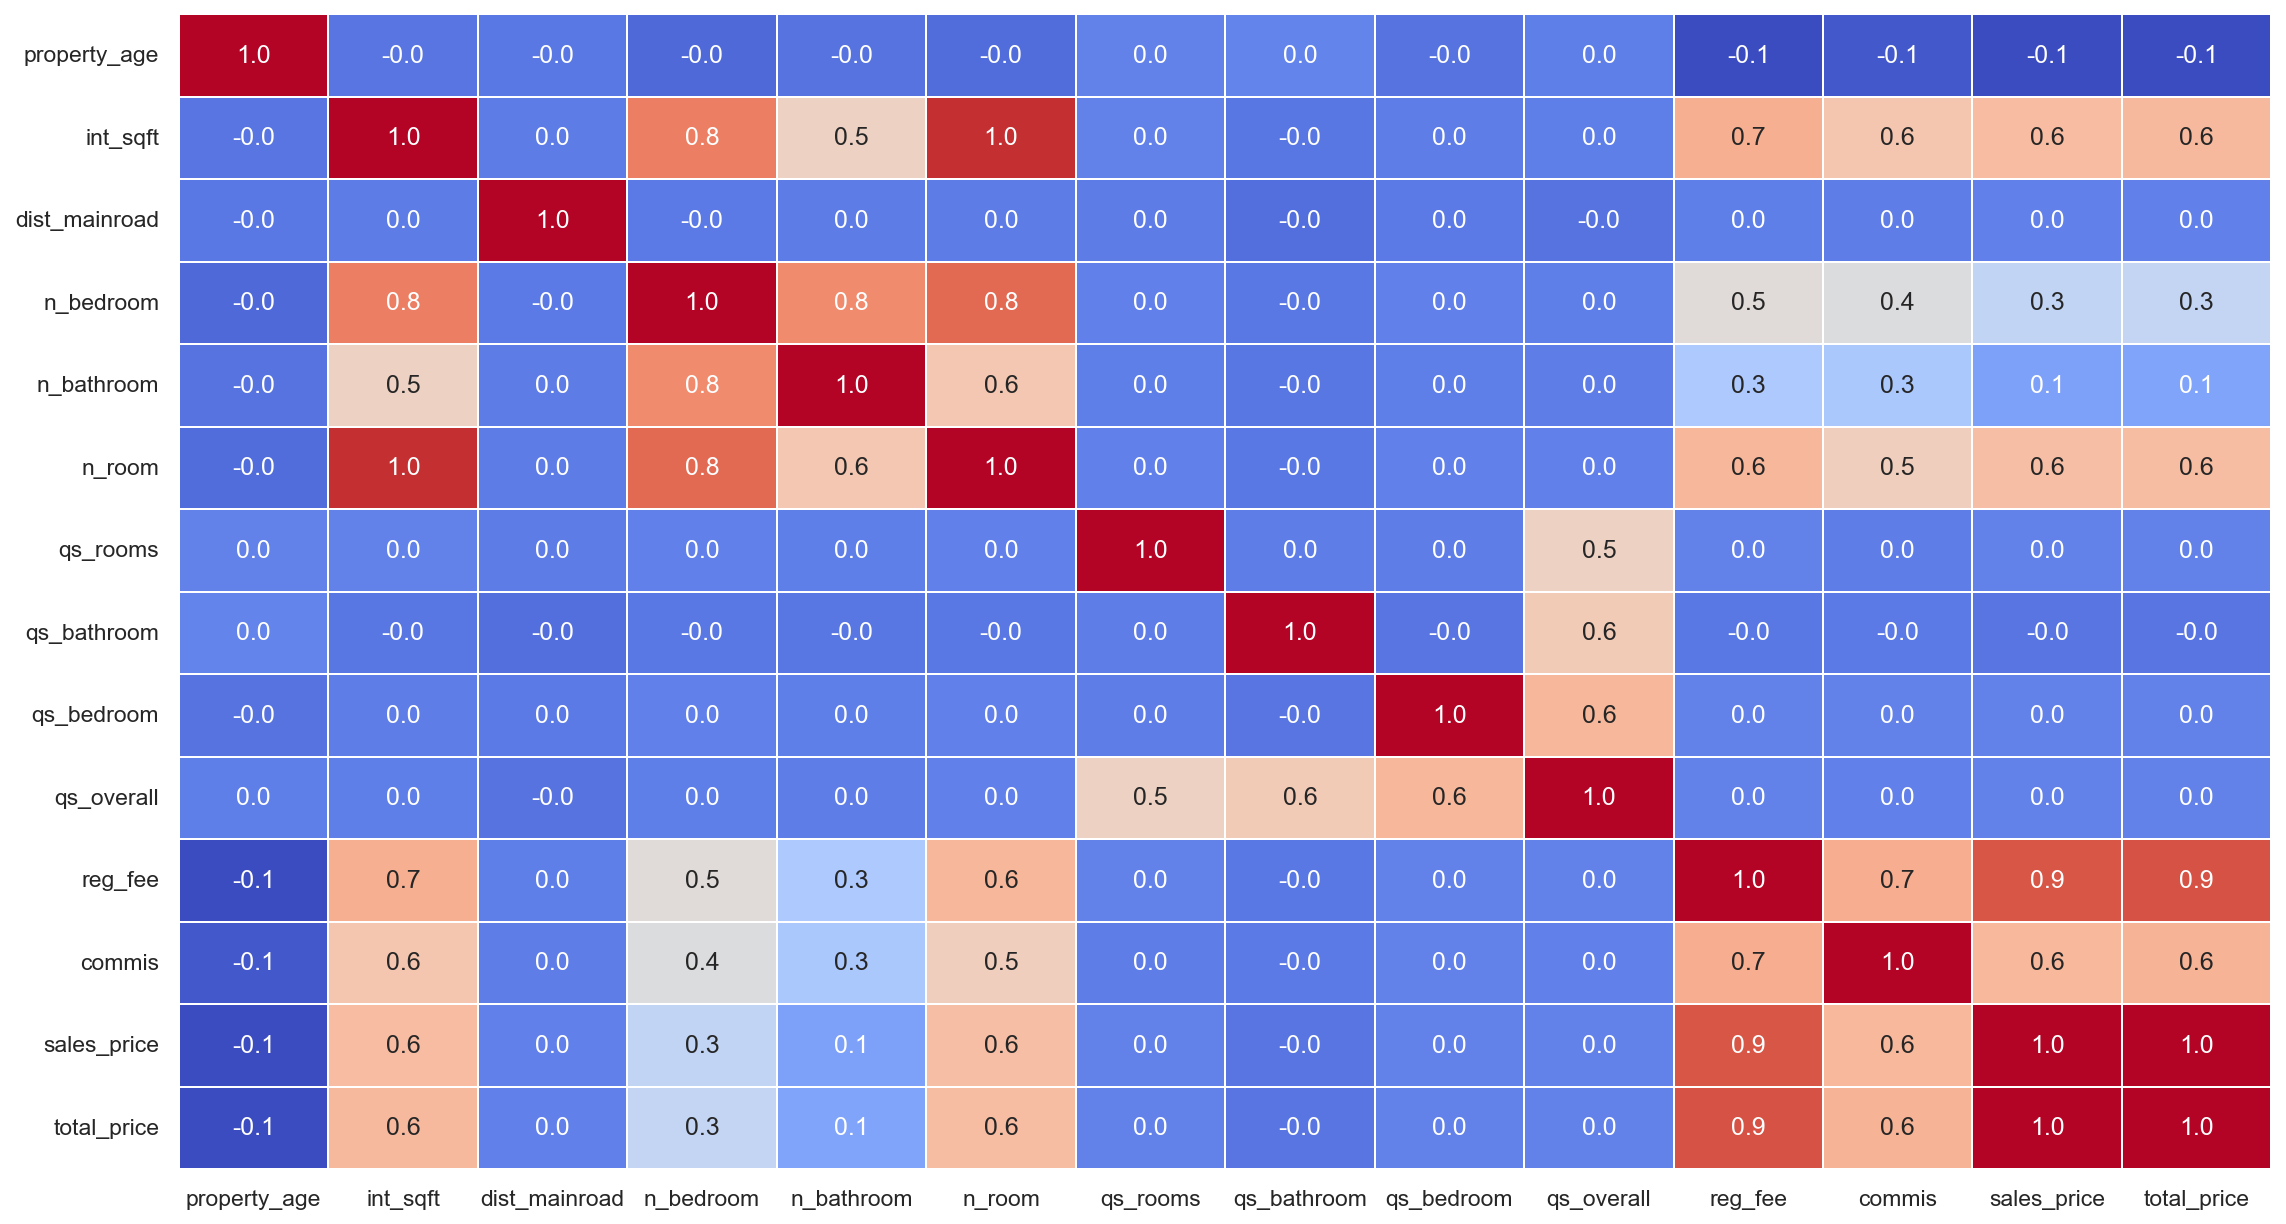

In [5]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(data.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

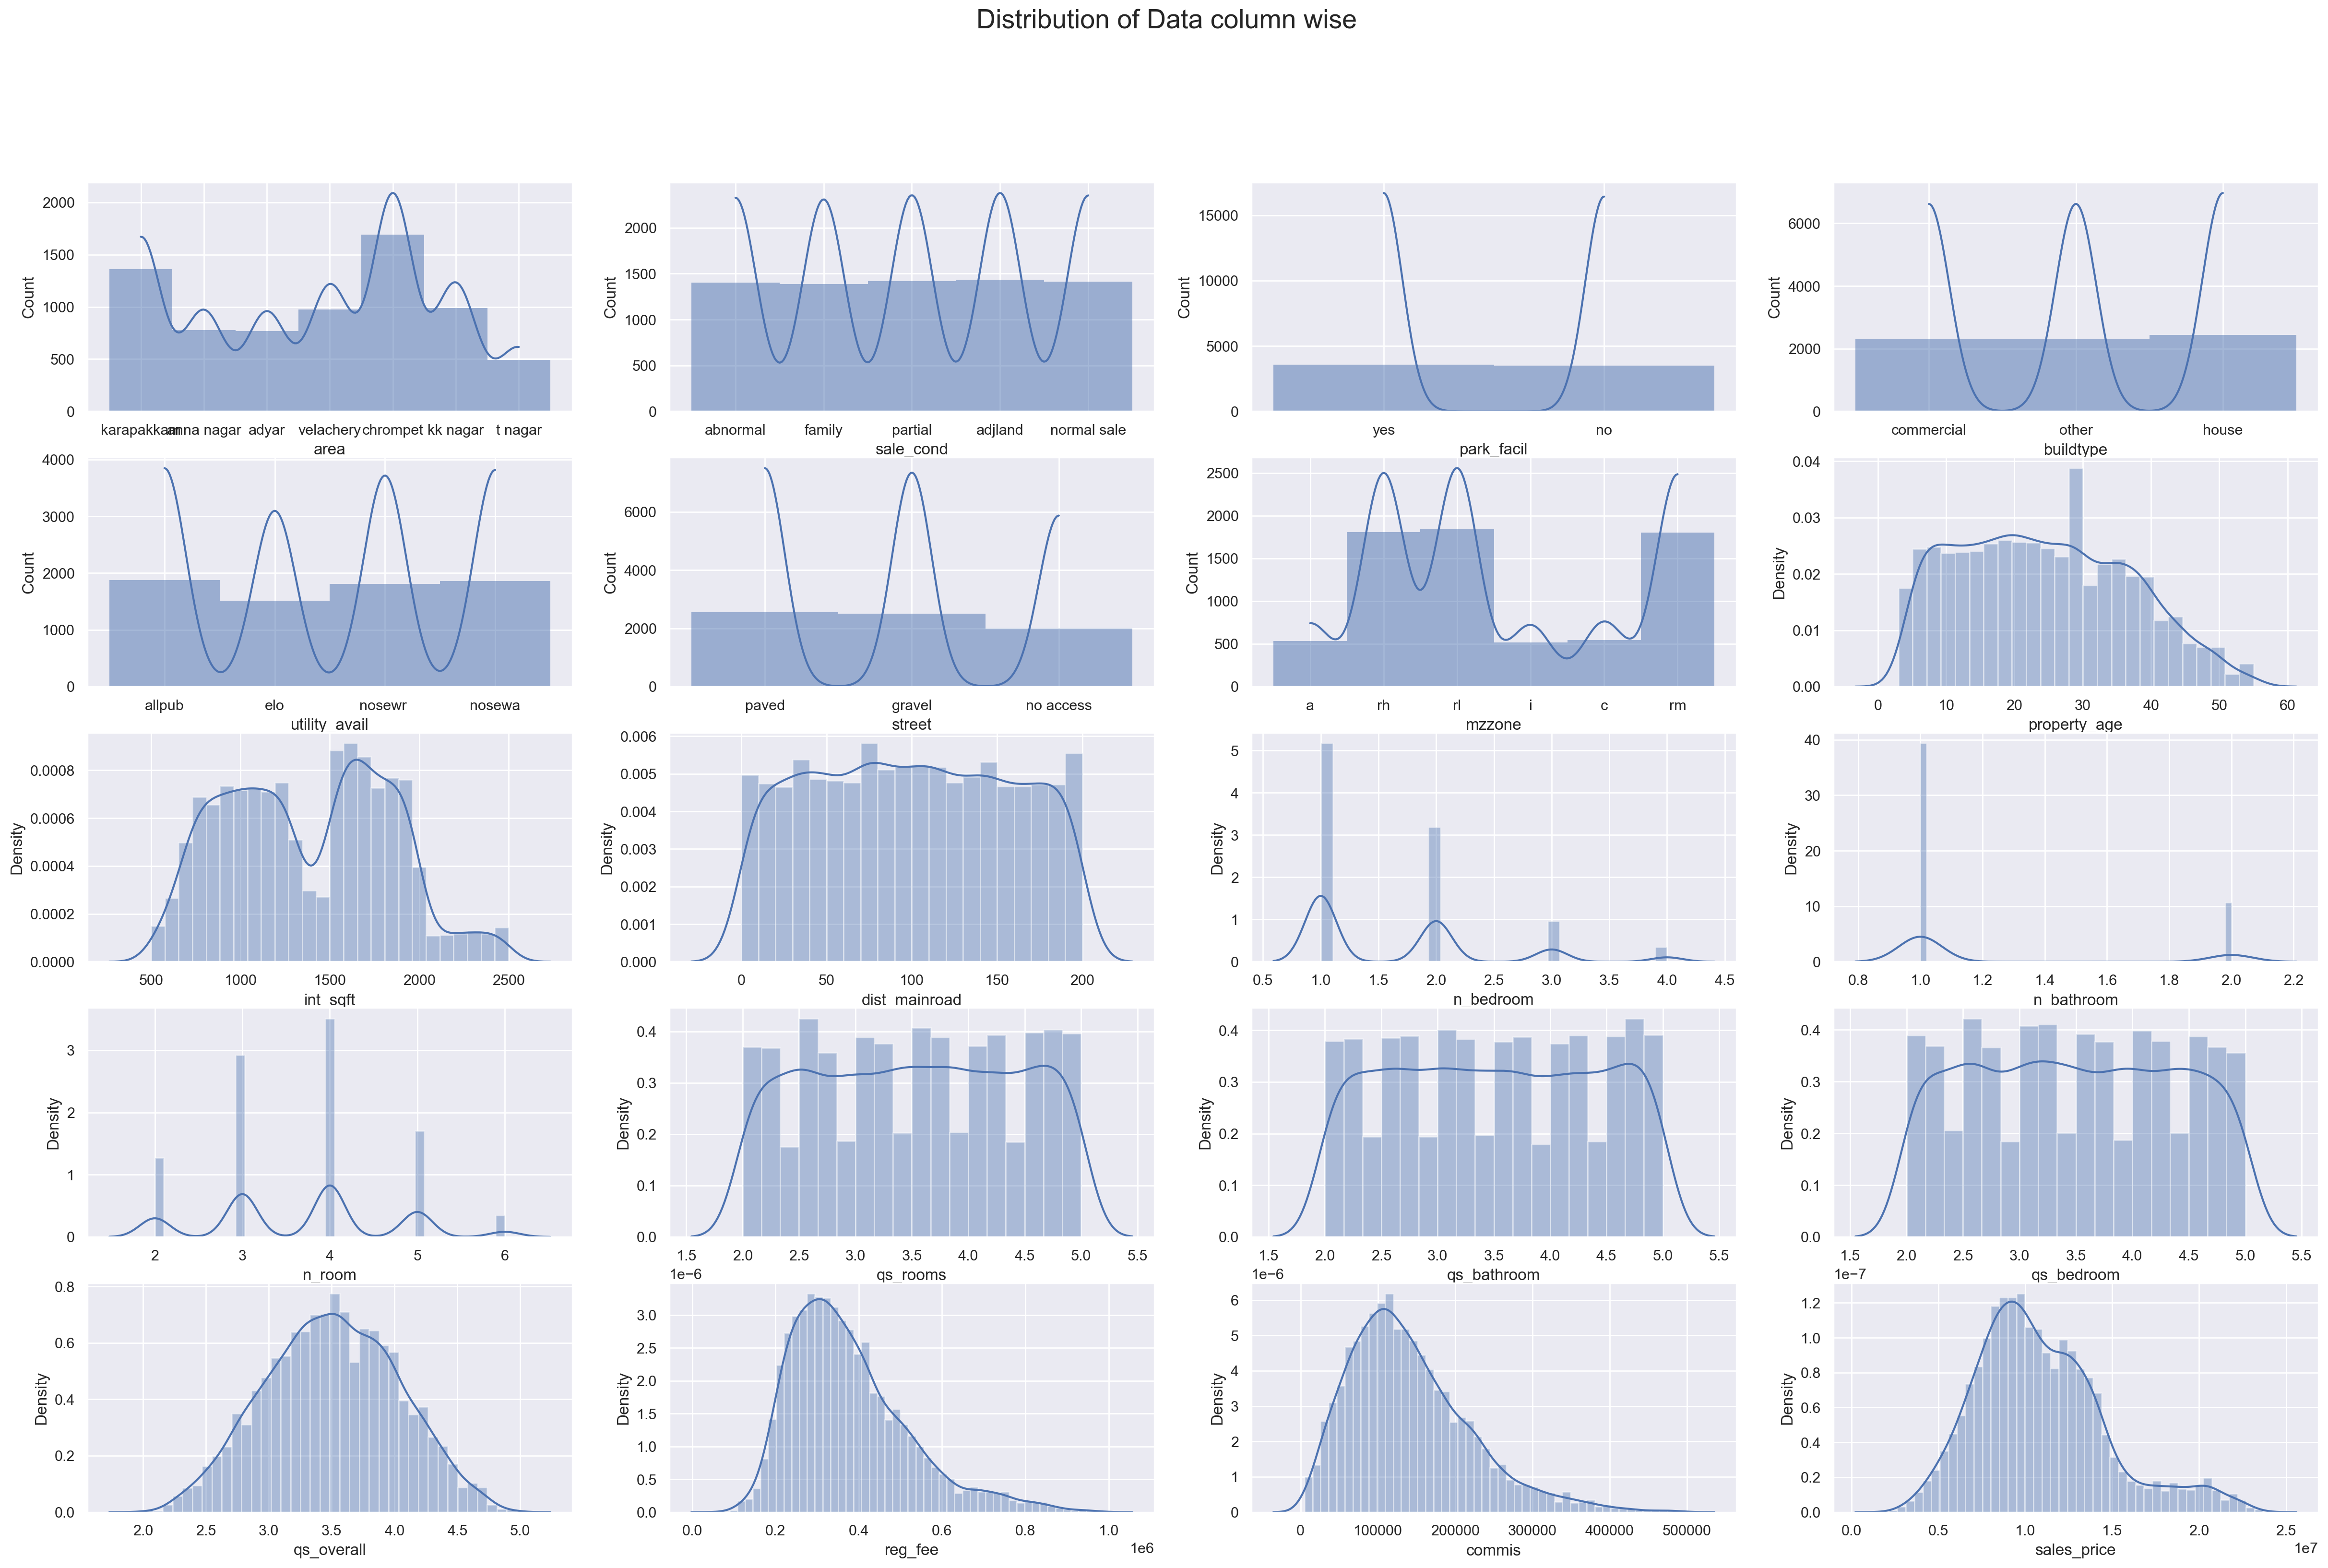

In [6]:
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(data.area, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(data.sale_cond, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(data.park_facil, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(data.buildtype, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(data.utility_avail, linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(data.street, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(data.mzzone, linewidth=0,kde=True)

plt.subplot(5,4,8)
sns.distplot(data.property_age)

plt.subplot(5,4,9)
sns.distplot(data.int_sqft)

plt.subplot(5,4,10)
sns.distplot(data.dist_mainroad)

plt.subplot(5,4,11)
sns.distplot(data.n_bedroom)

plt.subplot(5,4,12)
sns.distplot(data.n_bathroom)

plt.subplot(5,4,13)
sns.distplot(data.n_room)

plt.subplot(5,4,14)
sns.distplot(data.qs_rooms)

plt.subplot(5,4,15)
sns.distplot(data.qs_bathroom)

plt.subplot(5,4,16)
sns.distplot(data.qs_bedroom)

plt.subplot(5,4,17)
sns.distplot(data.qs_overall)

plt.subplot(5,4,18)
sns.distplot(data.reg_fee)

plt.subplot(5,4,19)
sns.distplot(data.commis)

plt.subplot(5,4,20)
sns.distplot(data.sales_price)

plt.suptitle("Distribution of Data column wise", fontsize=20)
plt.show()

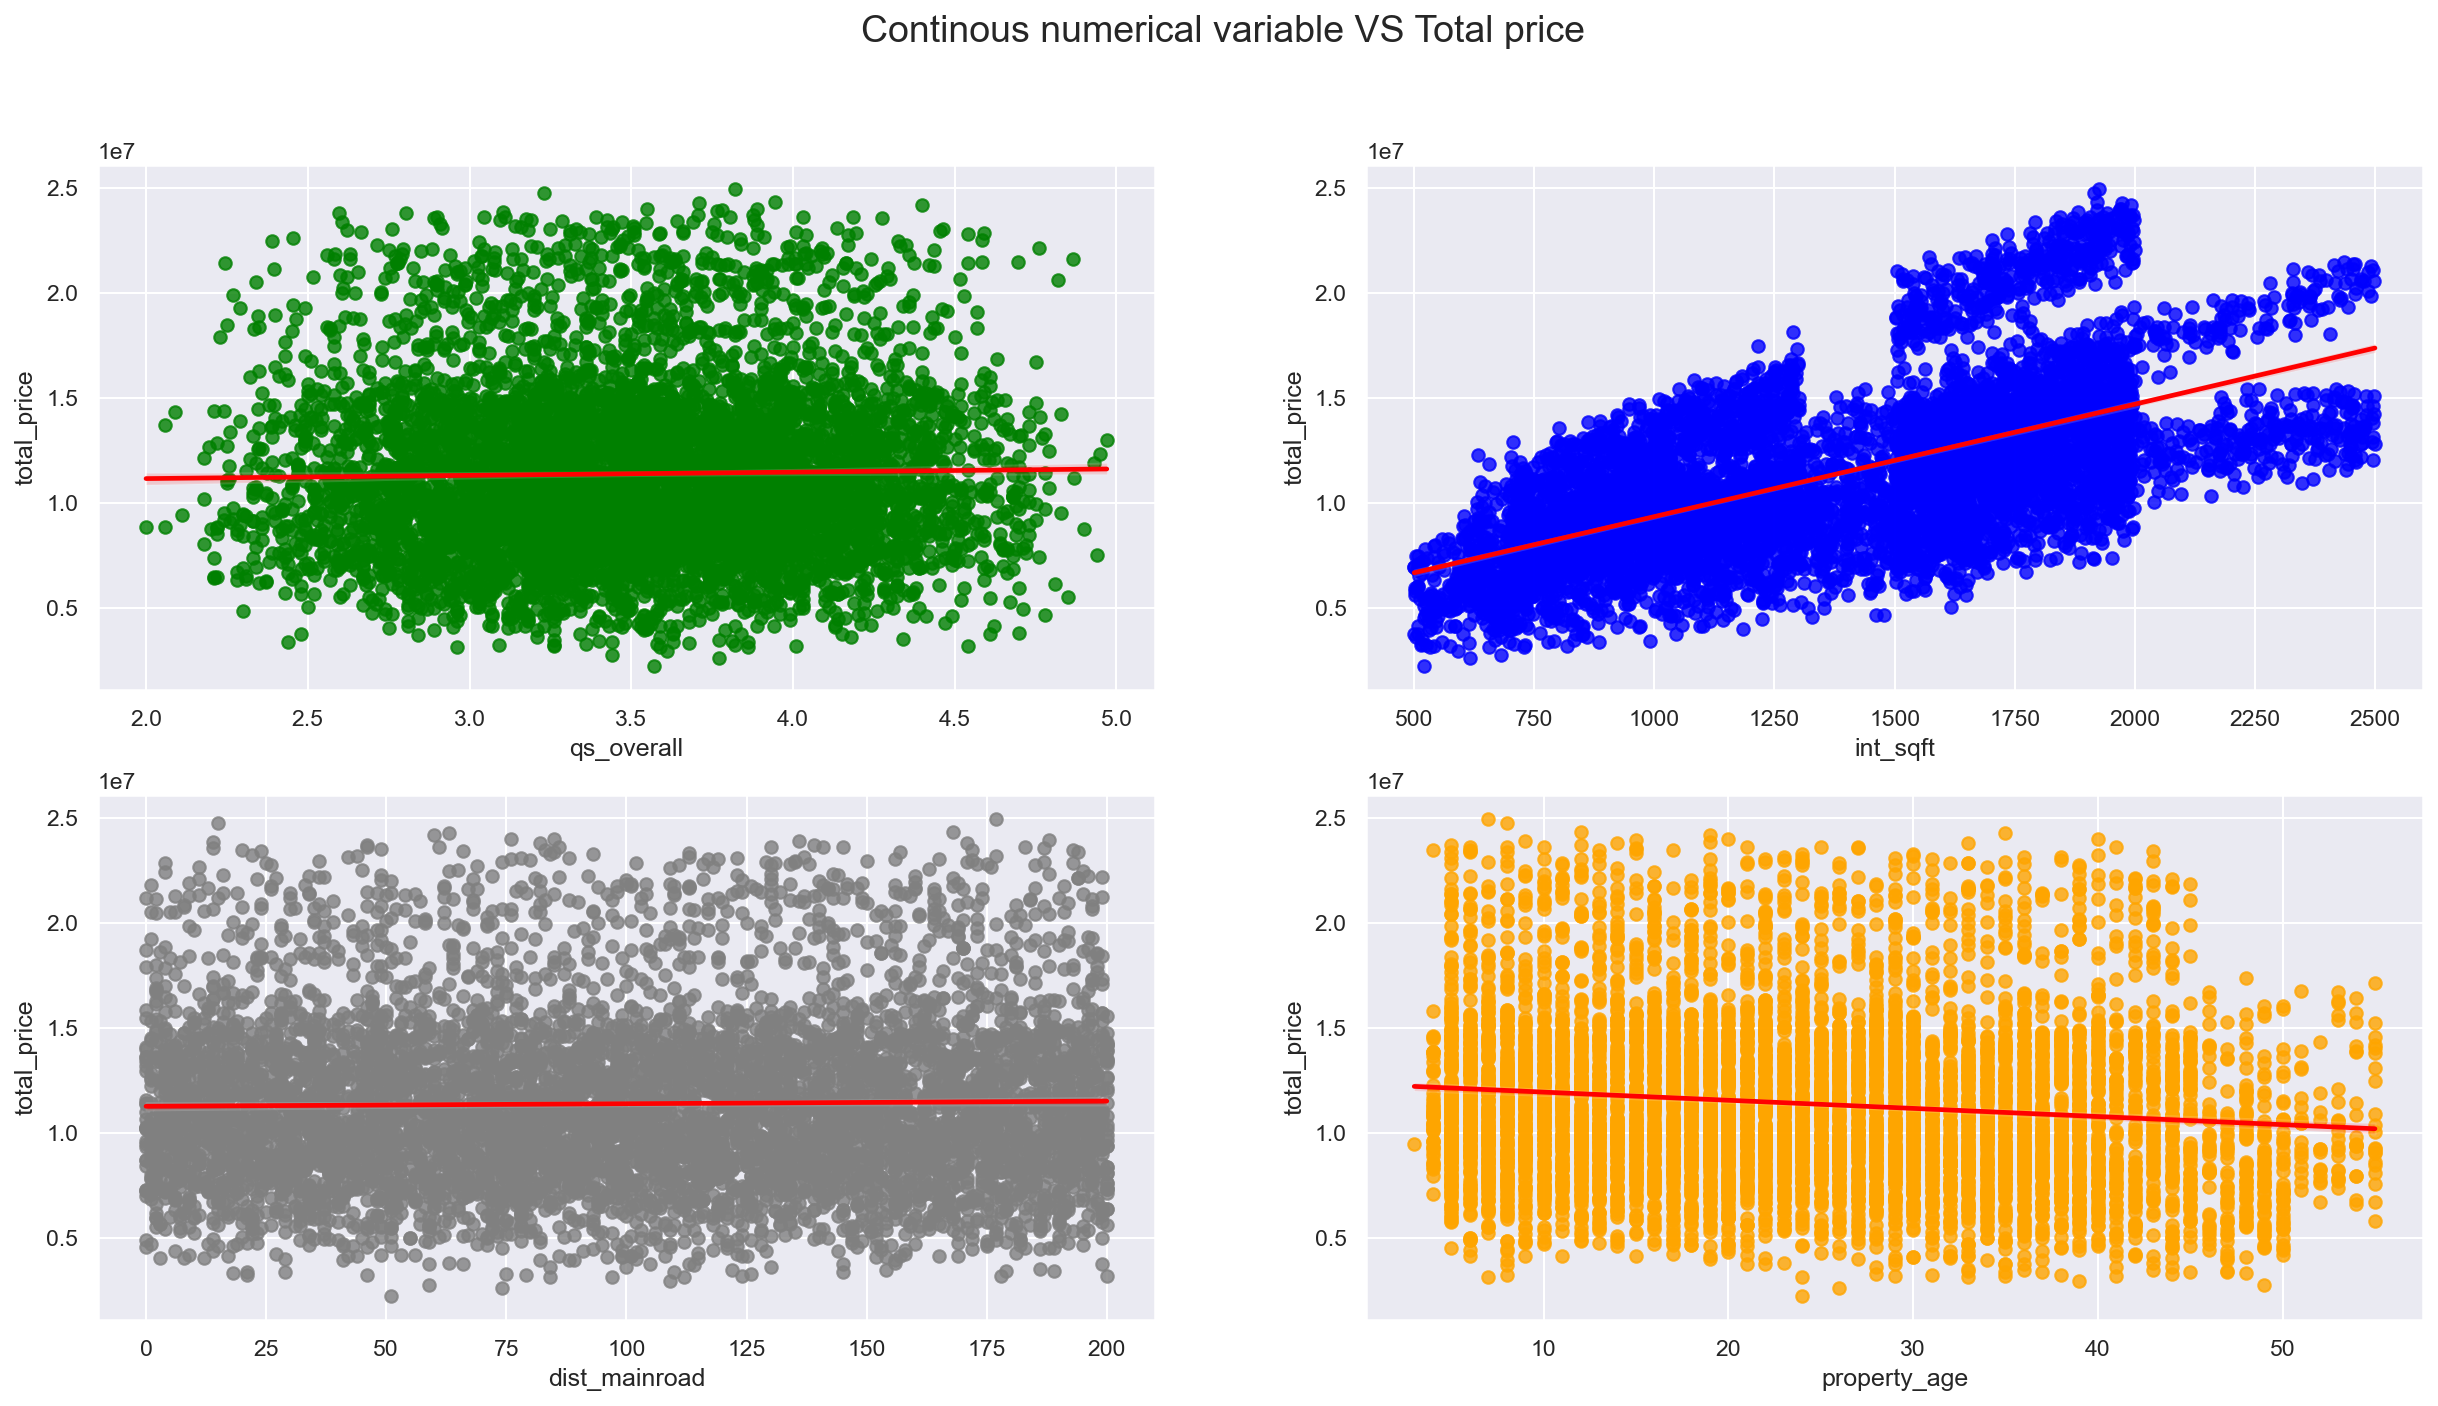

In [7]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.regplot(data.qs_overall, data.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(data.int_sqft, data.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(data.dist_mainroad, data.total_price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2,2,4)
sns.regplot(data.property_age, data.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.suptitle("Continous numerical variable VS Total price", fontsize=18)
plt.show()

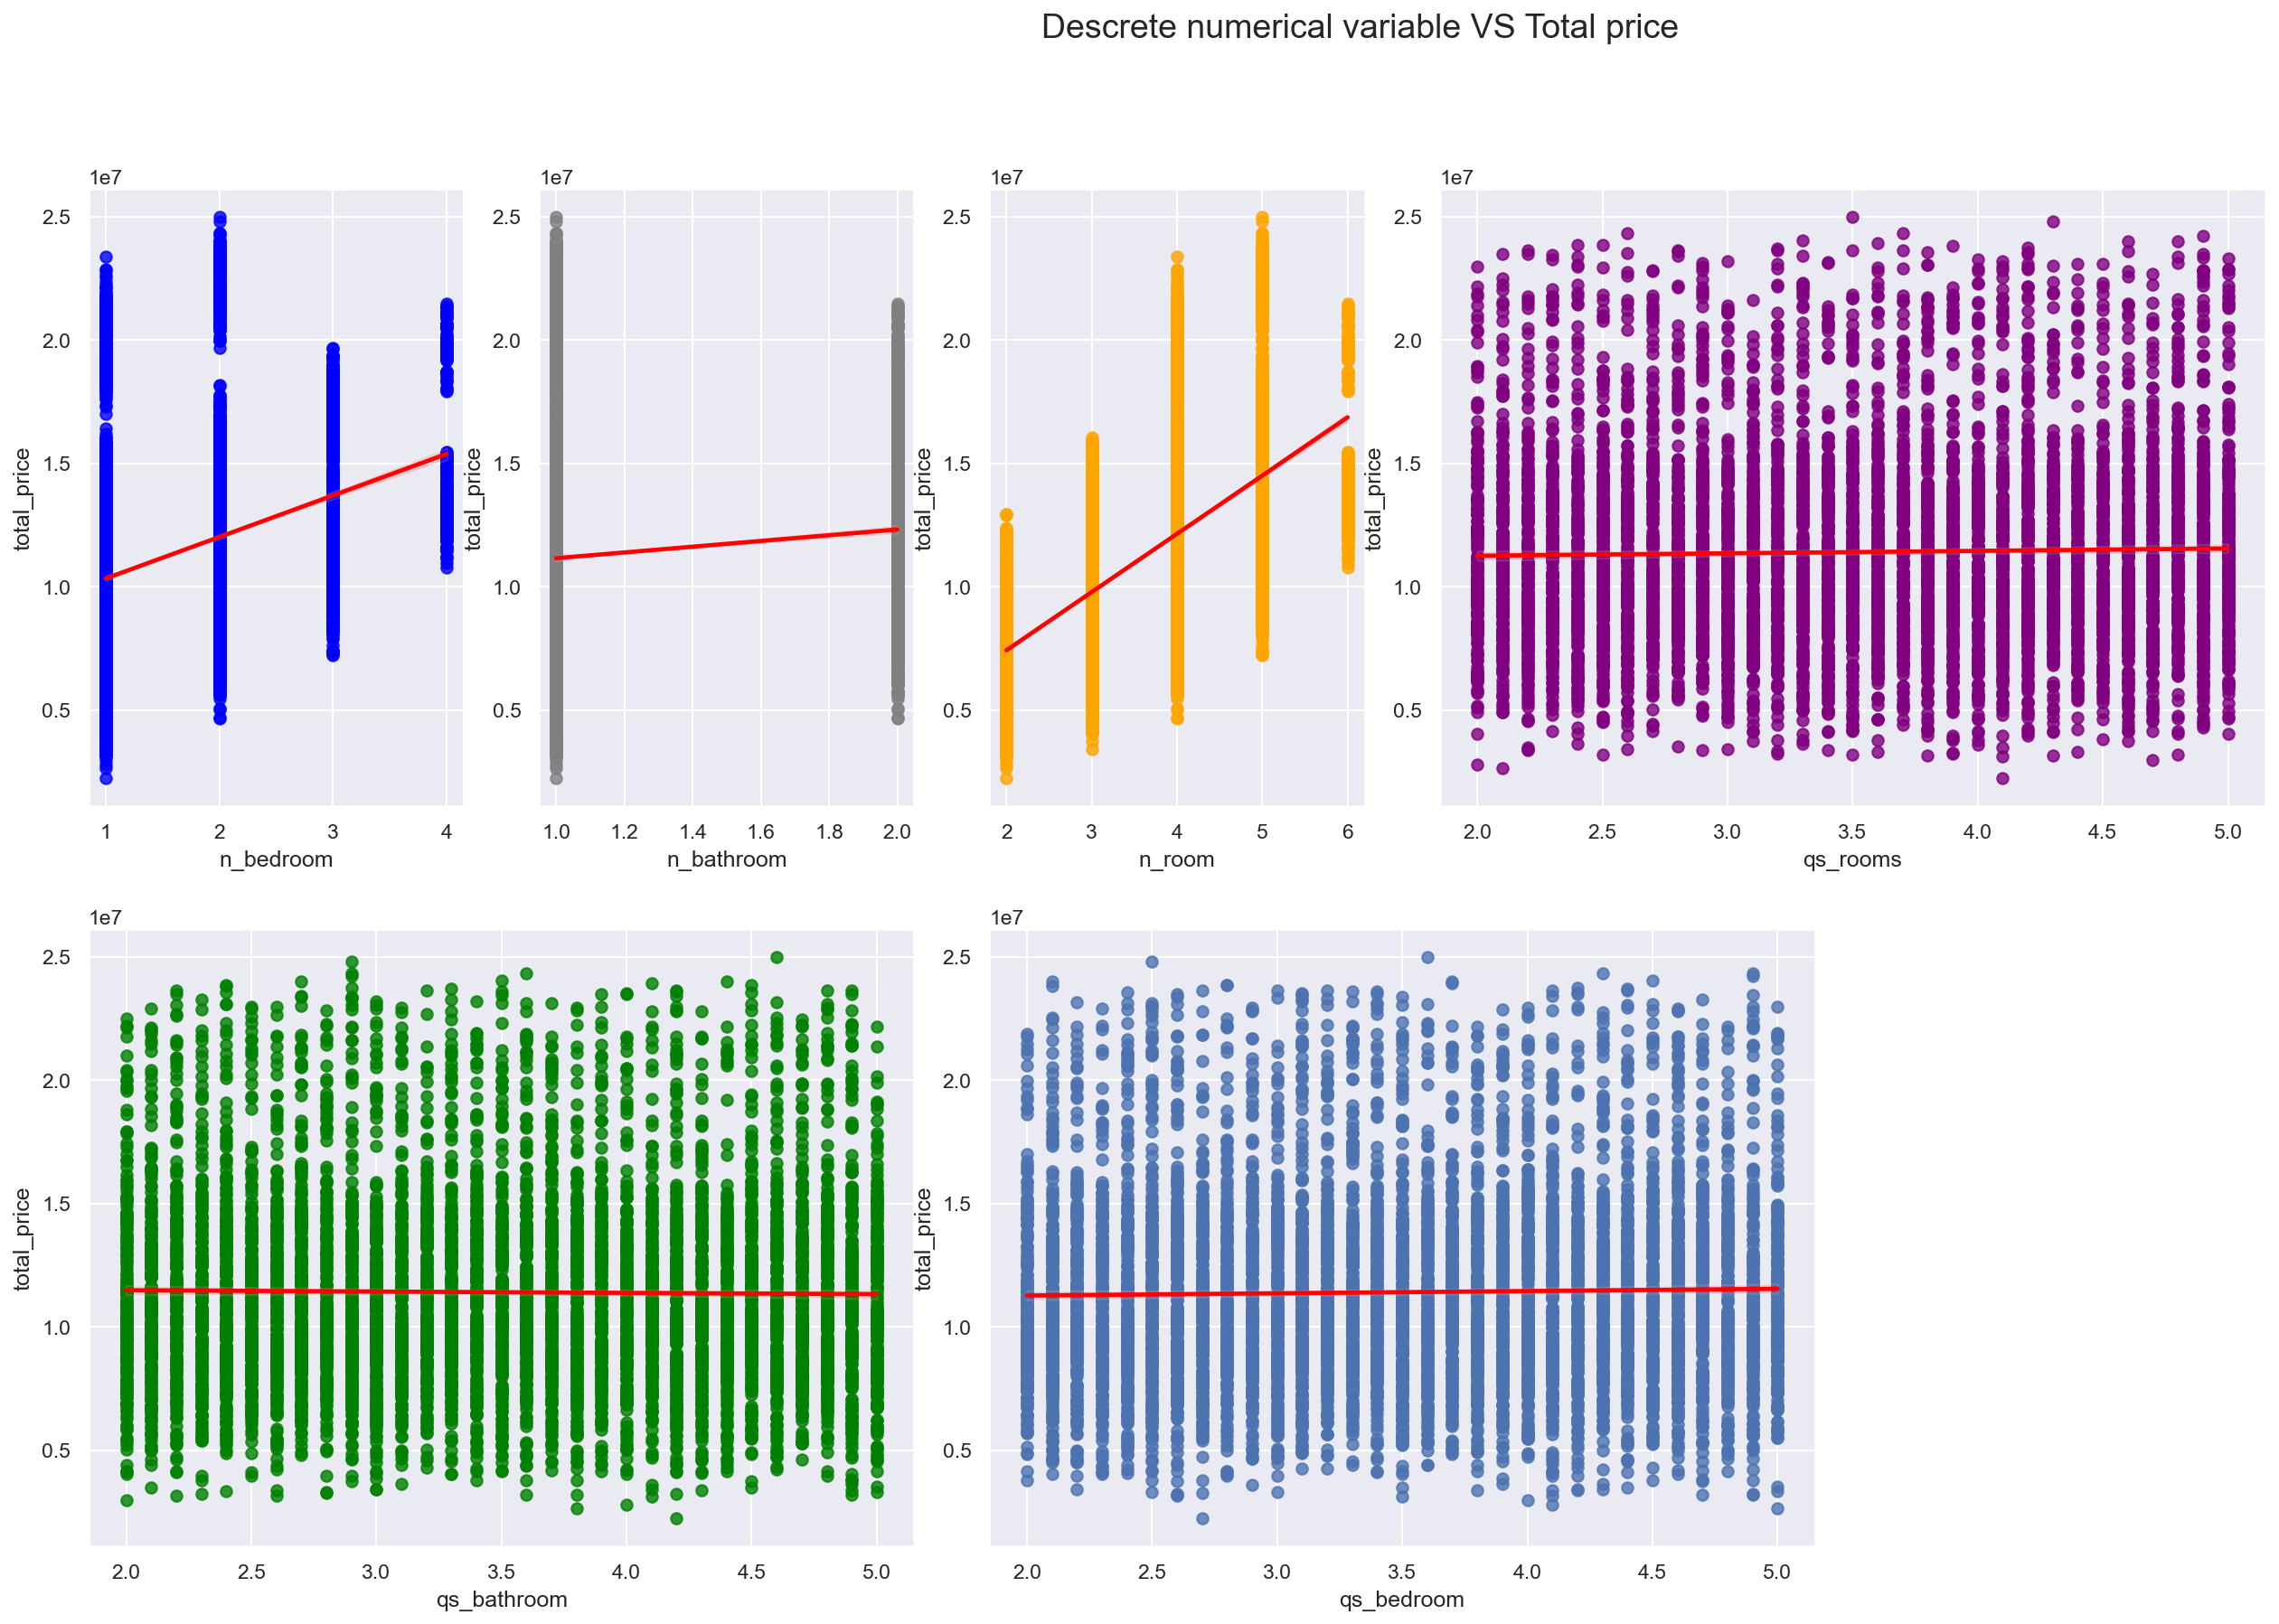

In [8]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0))
sns.regplot(data.n_bedroom, data.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,1))
sns.regplot(data.n_bathroom, data.total_price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot(data.n_room, data.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,3),colspan=2)
sns.regplot(data.qs_rooms, data.total_price, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.regplot(data.qs_bathroom, data.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,2),colspan=2)
sns.regplot(data.qs_bedroom, data.total_price, line_kws={"color": "red"})

plt.suptitle("Descrete numerical variable VS Total price", fontsize=18)
plt.show()

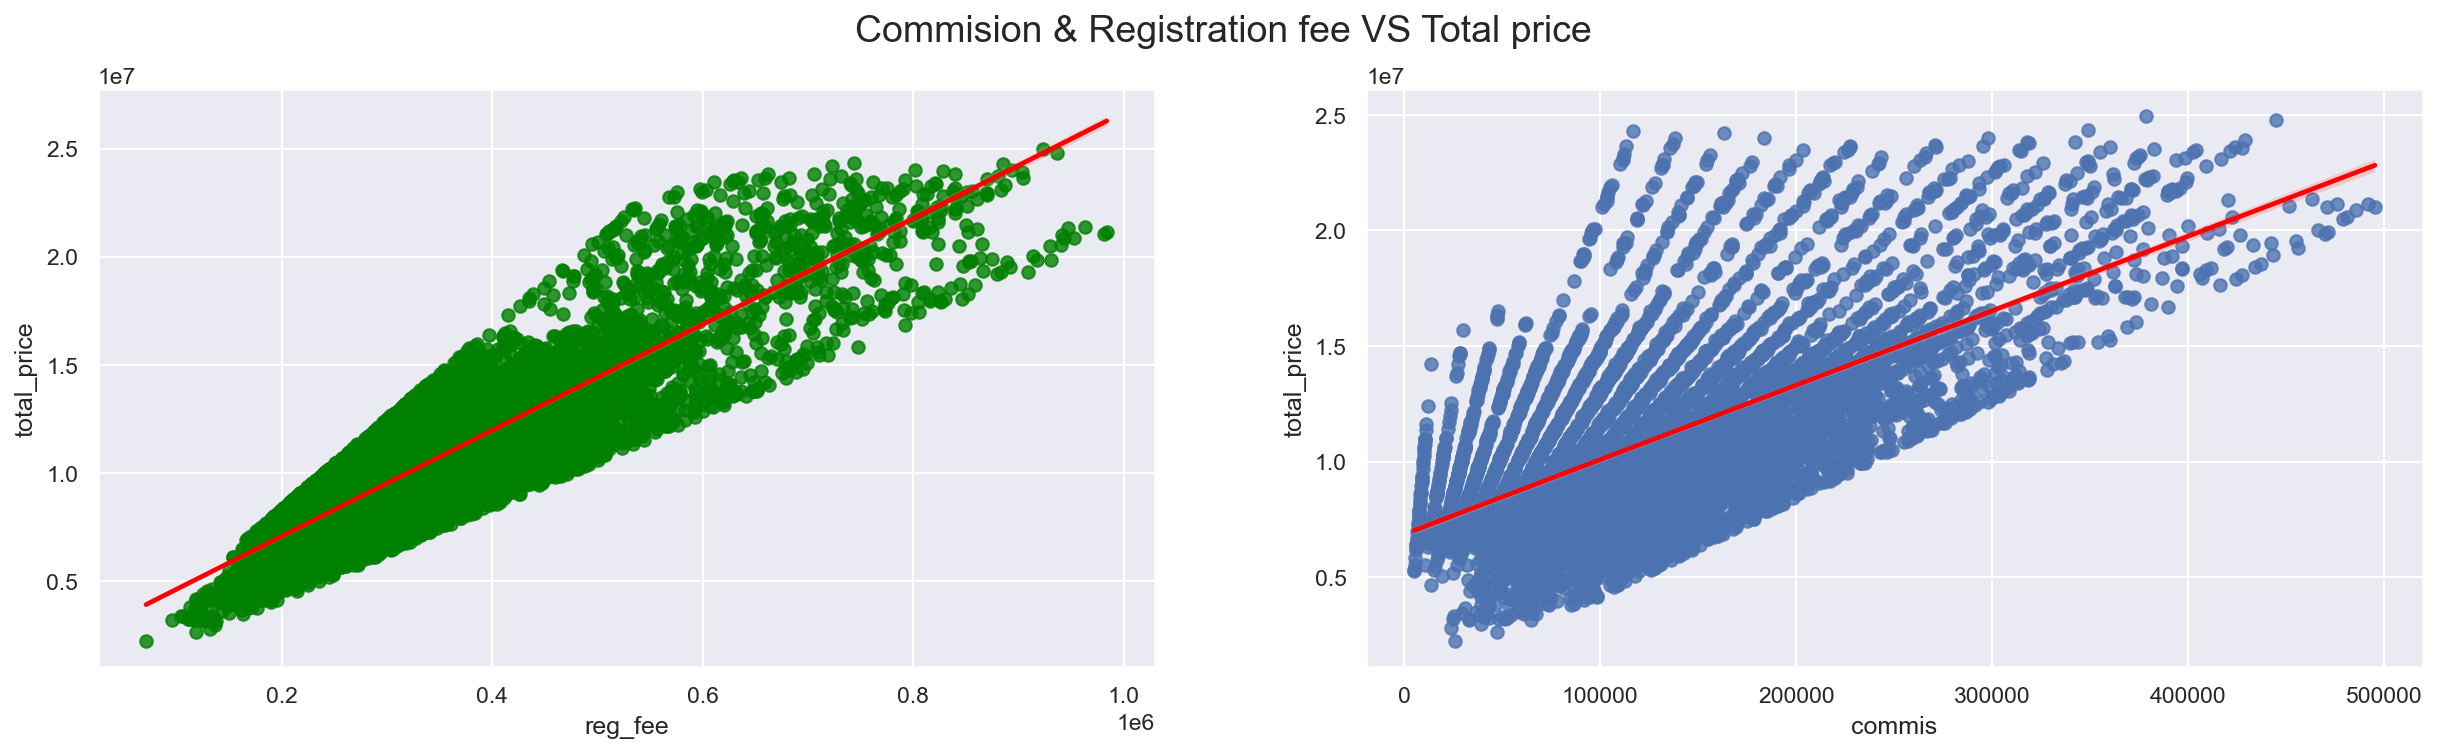

In [9]:
plt.figure(figsize=(20, 5), dpi=150)

plt.subplot(1,2,1)
sns.regplot(data.reg_fee, data.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(1,2,2)
sns.regplot(data.commis, data.total_price, line_kws={"color": "red"})

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()


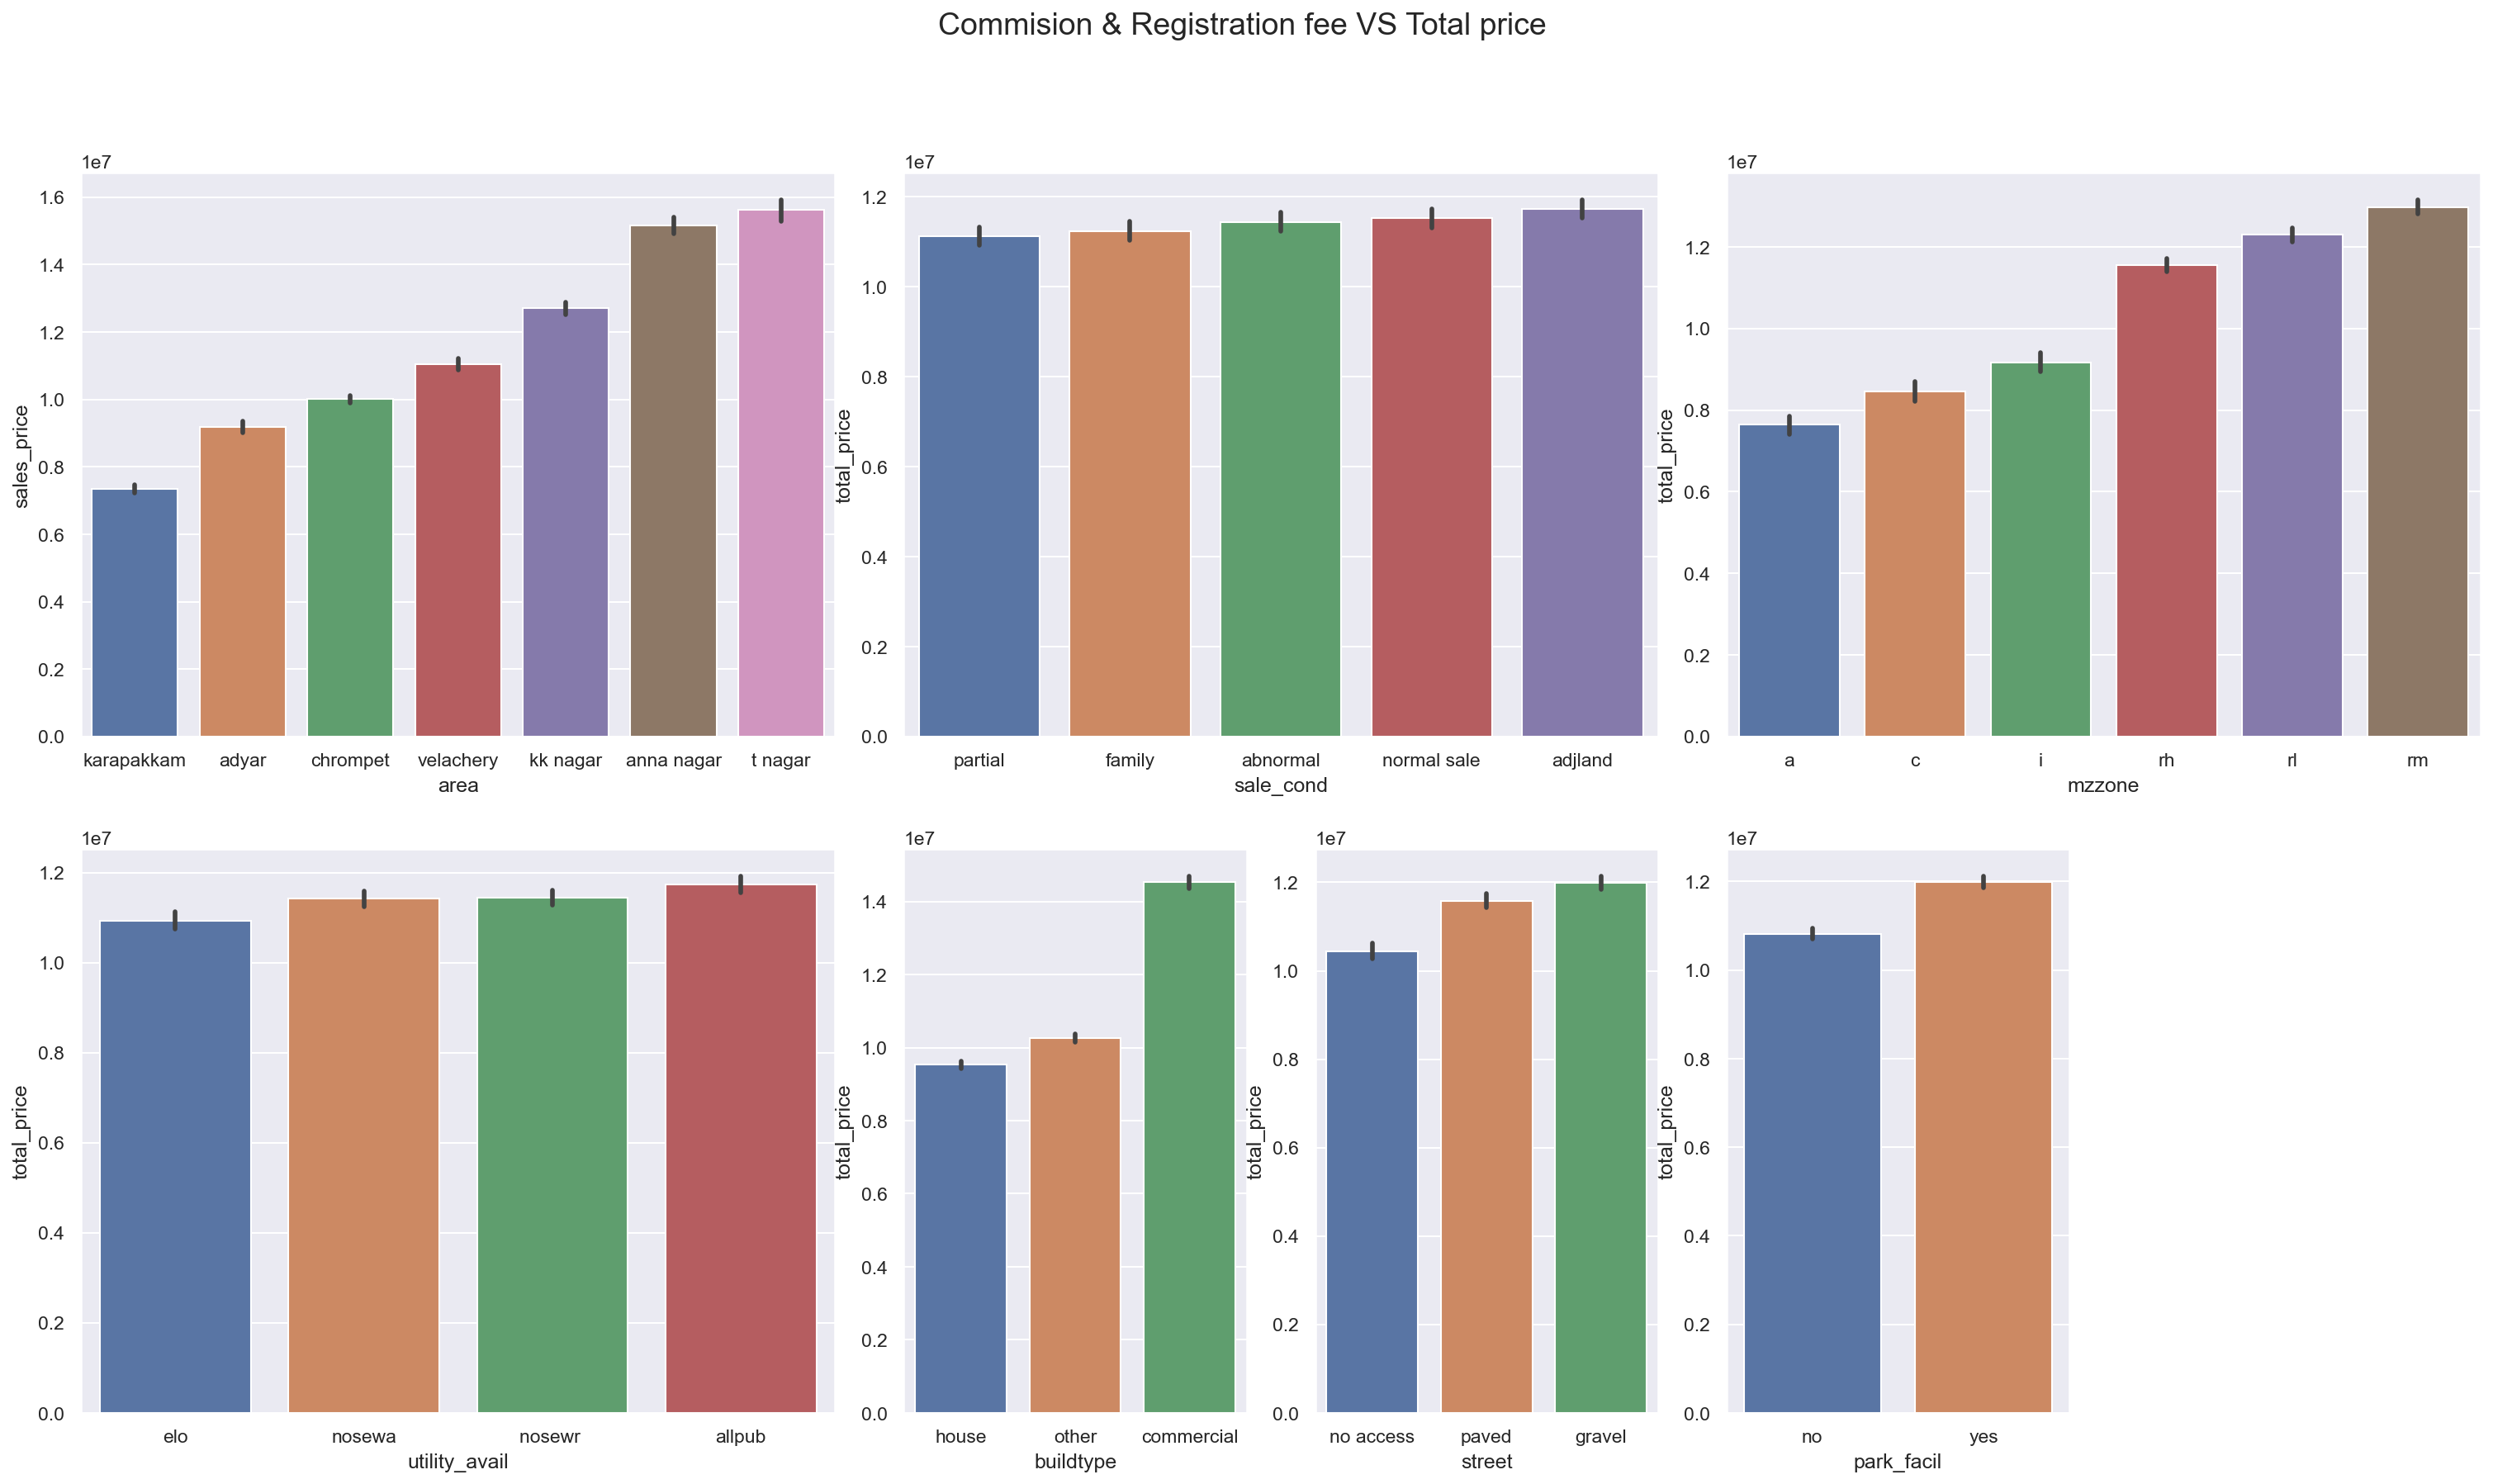

In [10]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=data.area,y=data.sales_price,order=data.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area'])

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=data.sale_cond,y=data.total_price,order=data.groupby('sale_cond')['total_price'].mean().reset_index().sort_values('total_price')['sale_cond'])

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=data.mzzone,y=data.total_price,order=data.groupby('mzzone')['total_price'].mean().reset_index().sort_values('total_price')['mzzone'])

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=data.utility_avail,y=data.total_price,order=data.groupby('utility_avail')['total_price'].mean().reset_index().sort_values('total_price')['utility_avail'])

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=data.buildtype,y=data.total_price,order=data.groupby('buildtype')['total_price'].mean().reset_index().sort_values('total_price')['buildtype'])

plt.subplot2grid((2,6),(1,3))
sns.barplot(x=data.street,y=data.total_price,order=data.groupby('street')['total_price'].mean().reset_index().sort_values('total_price')['street'])

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=data.park_facil,y=data.total_price,order=data.groupby('park_facil')['total_price'].mean().reset_index().sort_values('total_price')['park_facil'])

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

In [11]:
data = pd.get_dummies(data,columns=['buildtype'])

In [12]:
# Encoding the area column order-wise 
data.area = data.area.map({'karapakkam': 1,
                           'adyar': 2, 
                           'chrompet' : 3,
                           'velachery' : 4,
                           'kk nagar' : 5, 
                           'anna nagar' : 6,
                           't nagar' : 7})

# Encoding the sale_cond column order-wise 
data.sale_cond = data.sale_cond.map({'partial' : 1, 
                                     'family' : 2, 
                                     'abnormal' : 3, 
                                     'normal sale' : 4,
                                     'adjland' : 5})

# Encoding the park_facil column order-wise 
data.park_facil = data.park_facil.map({'yes':1,
                                       'no':0})

# Encoding the utility_avail column order-wise 
data.utility_avail = data.utility_avail.map({'elo' : 1, 
                                             'nosewa' : 2, 
                                             'nosewr ' : 3,
                                             'allpub' : 4})
                                          
# Encoding the street column order-wise 
data.street = data.street.map({'no access' : 1,
                               'paved' : 2, 
                               'gravel' : 3})


# Encoding the mzzone column order-wise 
data.mzzone = data.mzzone.map({'a' : 1,
                               'c' : 2,
                               'i' : 3,
                               'rl' : 5,
                               'rh' : 4,
                               'rm' : 6})

In [13]:
# Removing unnecessary columns and Rearranging the columns of dataframe 
data = data.reindex(columns = ['area', 'sale_cond', 'park_facil',
       'buildtype_commercial', 'buildtype_house','buildtype_other', 'utility_avail',
       'street', 'mzzone', 'property_age', 'int_sqft', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'qs_rooms', 'qs_bathroom', 'qs_bedroom',
        'qs_overall', 'reg_fee', 'commis', 'sales_price', 'total_price'])

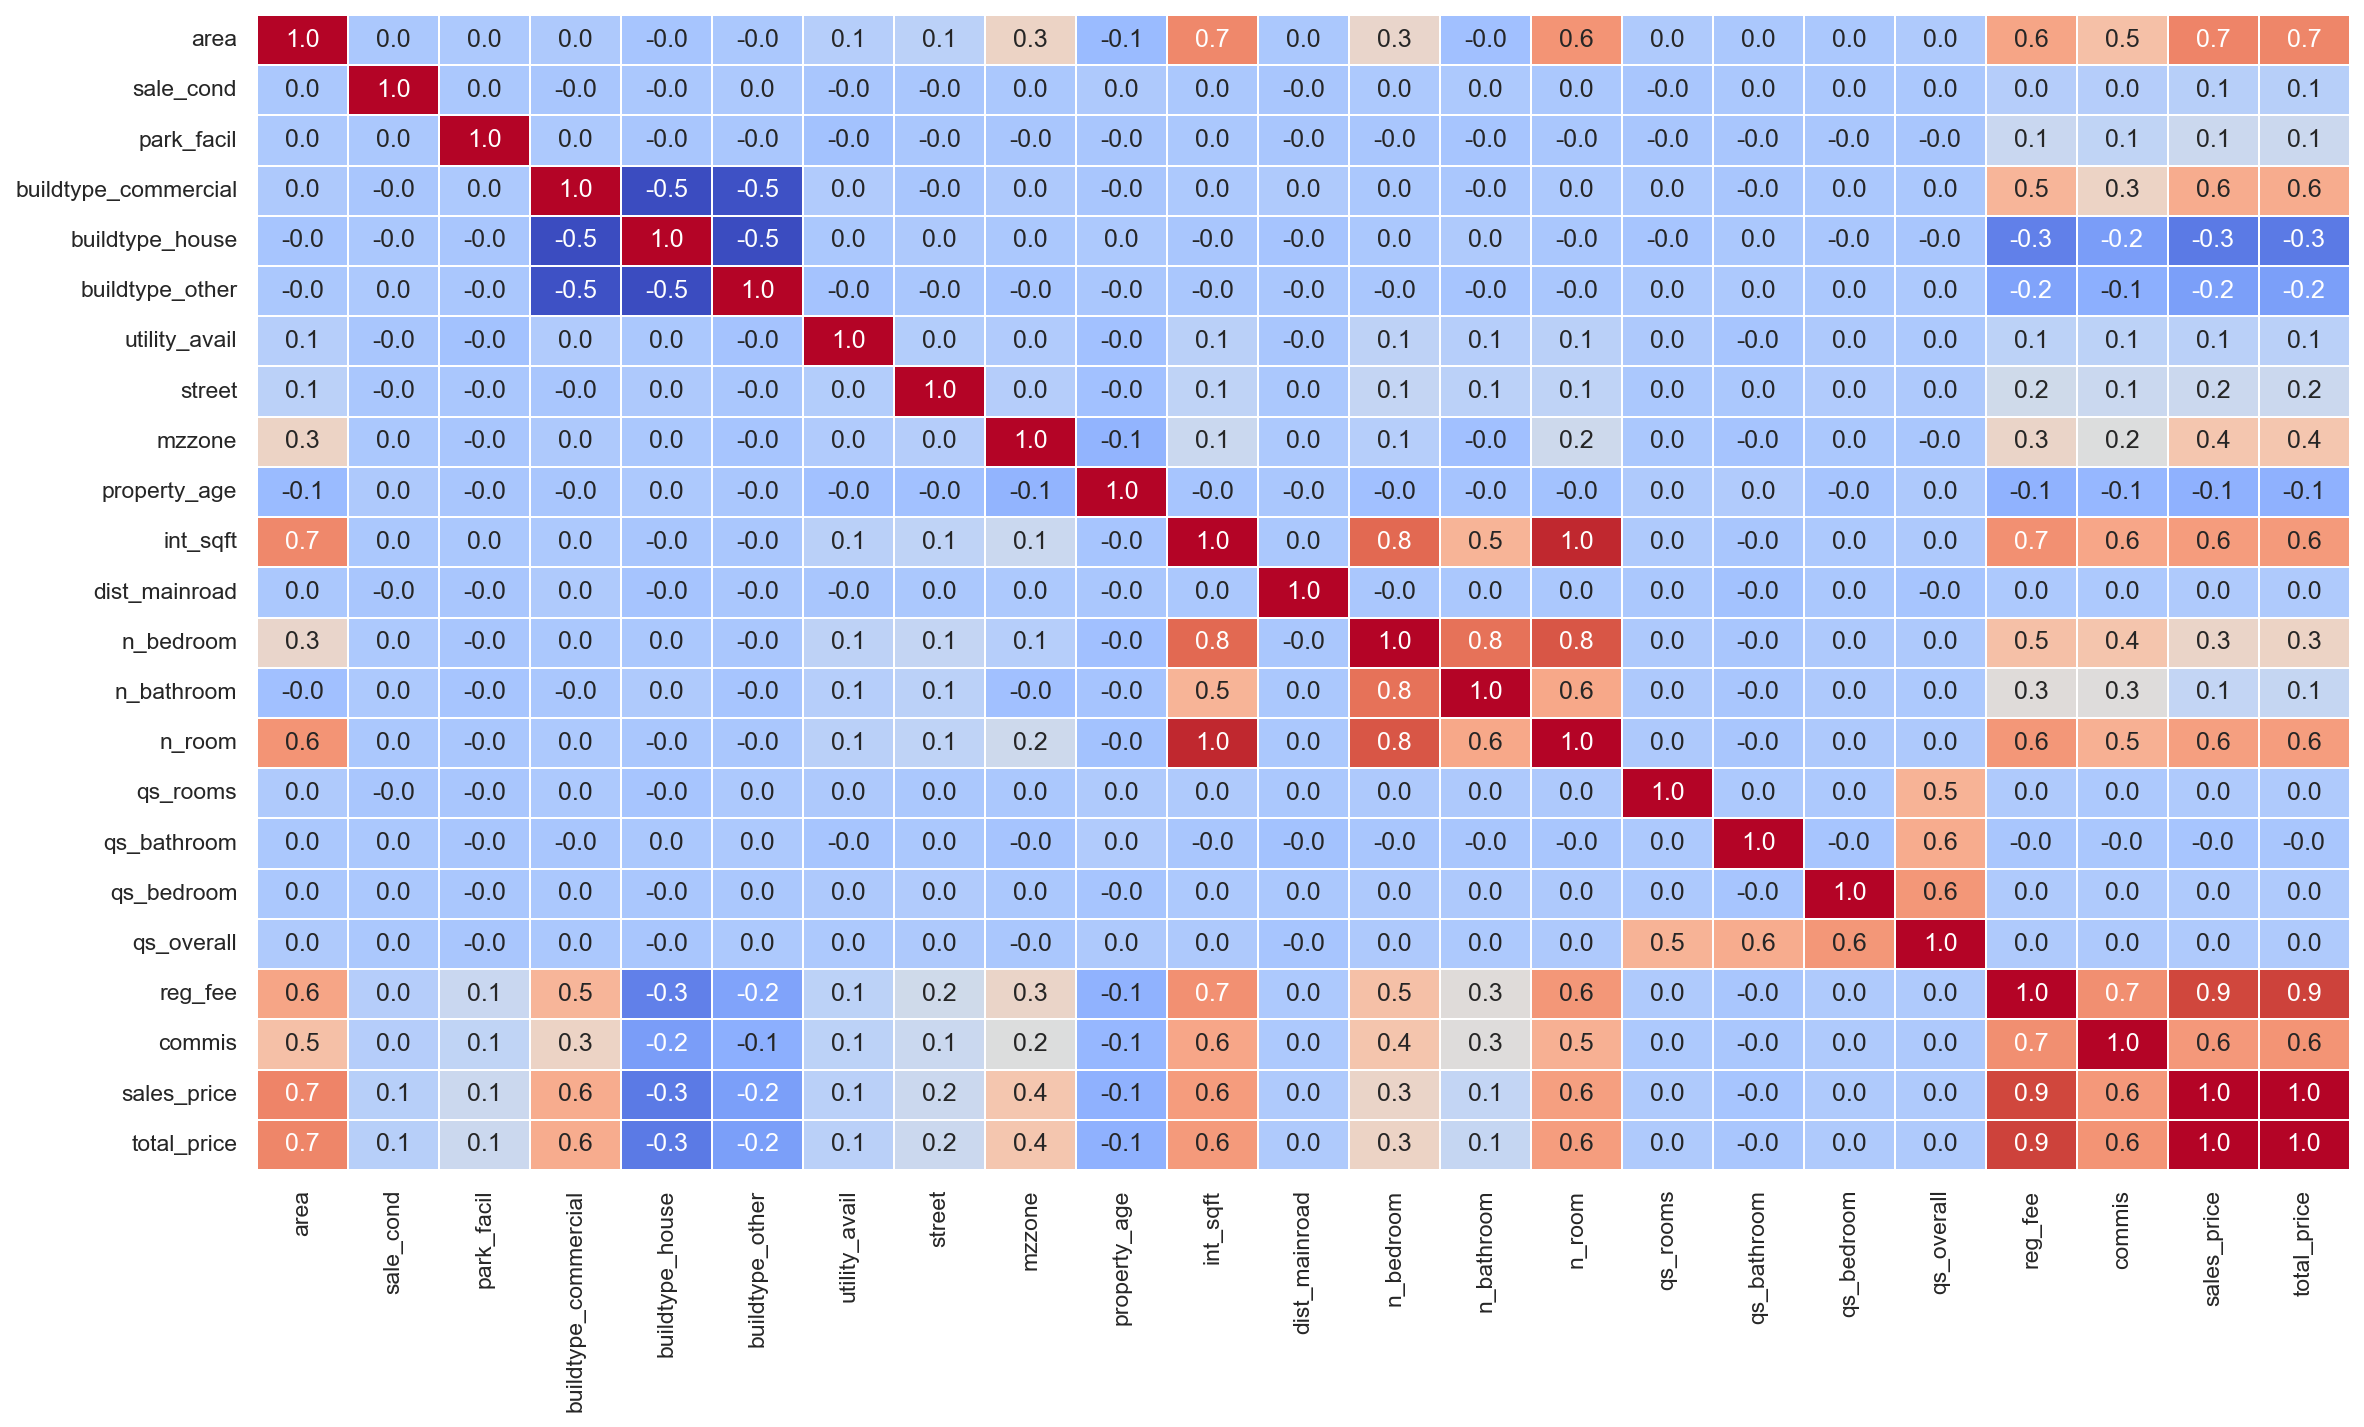

In [14]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(data.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

In [15]:
data.head(3)

area  sale_cond  park_facil  buildtype_commercial  buildtype_house  \
0     1          3           1                     1                0   
1     6          3           0                     1                0   
2     2          3           1                     1                0   

   buildtype_other  utility_avail  street  mzzone  property_age  int_sqft  \
0                0              4       2       1            44      1004   
1                0              4       3       4            11      1986   
2                0              1       3       5            20       909   

   dist_mainroad  n_bedroom  n_bathroom  n_room  qs_rooms  qs_bathroom  \
0            131          1           1       3       4.0          3.9   
1             26          2           1       5       4.9          4.2   
2             70          1           1       3       4.1          3.8   

   qs_bedroom  qs_overall  reg_fee  commis  sales_price  total_price  
0         4.9       4.330   380000  144400      7600000      8124400  
1         2.5       3.765   760122  304049     21717770     22781941  
2         2.2       3.090   421094   92114     13159200     13672408

In [16]:
# Removing unnecessary features thich has negligible relation with total_price
df = data.copy()
df.drop(['qs_overall', 'dist_mainroad', 'qs_overall','qs_rooms', 'qs_bathroom', 'qs_bedroom', 'reg_fee',	'commis'], axis=1, inplace=True)

In [17]:
df.drop(['sale_cond', 'park_facil', 'buildtype_commercial', 'buildtype_house', 'buildtype_other', 'utility_avail', 'street', 'mzzone', 'property_age', 'n_room'], axis =1, inplace=True)

In [18]:
# input_cols = ['area', 'sale_cond', 'park_facil', 'buildtype_commercial',	'buildtype_house',
#               'buildtype_other', 'utility_avail', 'street', 'mzzone', 'property_age',
#               'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room']

input_cols = ['area', 'int_sqft', 'n_bedroom', 'n_bathroom']
target_cols = 'sales_price'
target1_cols = 'total_price'

input = df[input_cols].copy()
target = df[target_cols].copy()
target1 = df[target1_cols].copy()

In [19]:
df.to_csv("Cleaned_data.csv")

In [20]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state = 7)

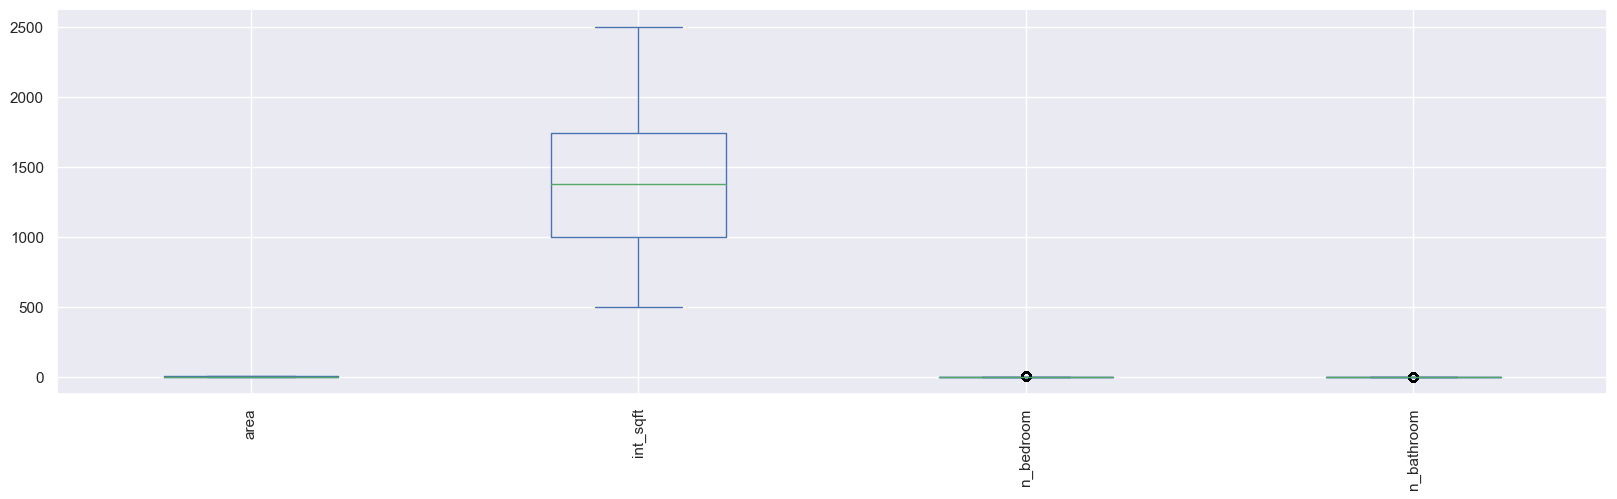

In [21]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()

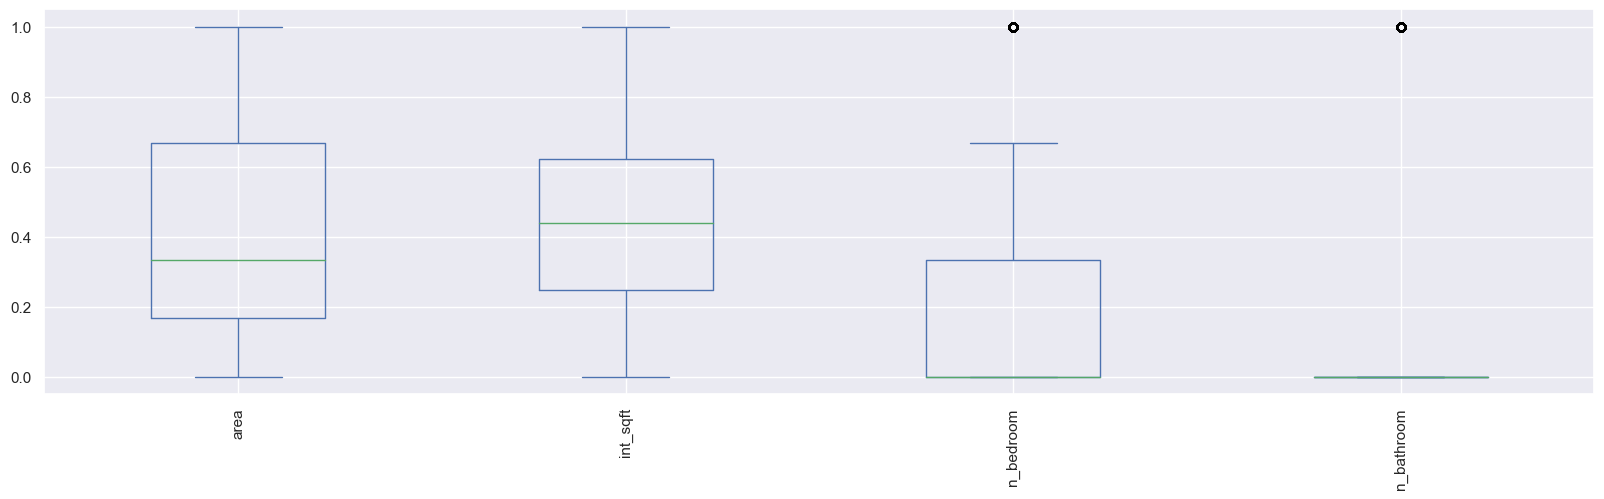

In [22]:
mm = MinMaxScaler().fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)
X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)
X_train_mm.plot.box(figsize=(20,5), rot=90)
plt.show()

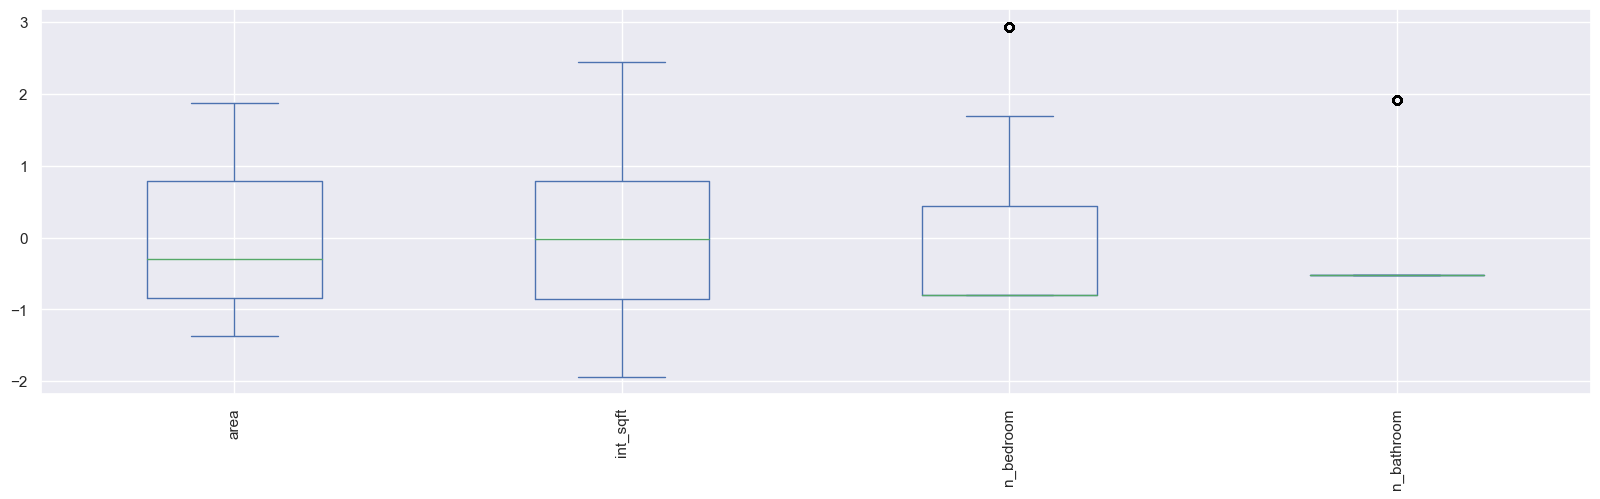

In [23]:
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_train_ss = pd.DataFrame(X_train_ss, columns=X_train.columns)
X_test_ss = ss.transform(X_test)
X_test_ss = pd.DataFrame(X_test_ss, columns=X_test.columns)
X_train_ss.plot.box(figsize=(20,5), rot=90)
plt.show()


In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

# lr = LinearRegression()
lr.fit(X_train_ss, y_train)
y_predlrss = lr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predlrss))

# lr = LinearRegression()
lr.fit(X_train_mm, y_train)
y_predlrmm = lr.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predlrmm))

R2- SCORE: 0.5448471259357599
R2- SCORE(Standardscaler): 0.5448471259357599
R2- SCORE(Minmaxscaled): 0.5448471259357599


Orange and Blue depict RSME for MinMaxScaler and blue


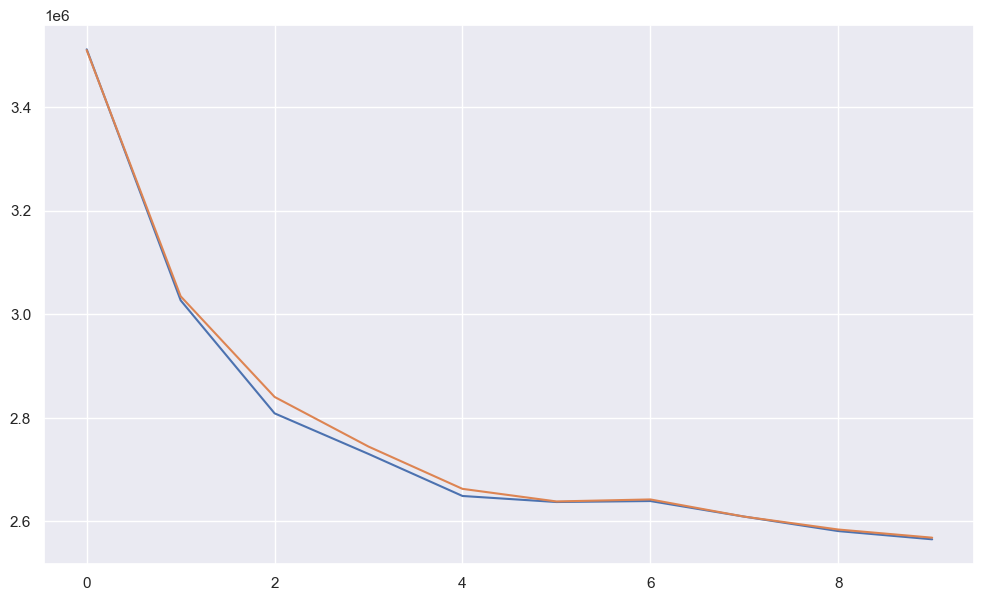

In [25]:
rmse_val = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_mm, y_train)
    pred=model.predict(X_test_mm)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
curve = pd.DataFrame(rmse_val)

rmse_val1 = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_ss, y_train)
    pred=model.predict(X_test_ss)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val1.append(error)
curve1 = pd.DataFrame(rmse_val1)

print('Orange and Blue depict RSME for MinMaxScaler and blue')
plt.figure(figsize=(12,7))
plt.plot(curve)
plt.plot(curve1)
plt.show()

In [26]:
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_predknn))

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_mm, y_train)
y_predknn_mm = knn.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predknn_mm))

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_ss, y_train)
y_predknn_ss = knn.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predknn_ss))

R2- SCORE: 0.42211474419308437
R2- SCORE(Minmaxscaled): 0.44412718861219236
R2- SCORE(Standardscaler): 0.46922756937714694


In [27]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))

dt.fit(X_train_mm, y_train)
y_pred_dtmm = dt.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_pred_dtmm))

dt.fit(X_train_ss, y_train)
y_pred_dtss = dt.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_dtss))

R2- SCORE: 0.26182593084526273
R2- SCORE(Minmaxscaled): 0.2644213577227409
R2- SCORE(Standardscaler): 0.2630577738851345


In [28]:
# dt = DecisionTreeRegressor()
# knn = KNeighborsRegressor(n_neighbors=100)
# lr = LinearRegression()
# rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
# xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)
# gbr = GradientBoostingRegressor(learning_rate=.5)
# etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)

# vr = VotingRegressor([('dt', dt), ('knn', knn), ('lr', lr), ('rf', rf), ('xg', xg), ('gbr', gbr), ('etr', etr)])

# vr.fit(X_train, y_train);
# y_pred_vr = vr.predict(X_test)
# print('R2- SCORE:', metrics.r2_score(y_test,y_pred_vr))

# vr.fit(X_train_ss, y_train);
# y_pred_vrss = vr.predict(X_test_ss)
# print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_vrss))

# vr.fit(X_train_mm, y_train);
# y_pred_vrmm = vr.predict(X_test_mm)
# print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_vr))

In [29]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_rf))

rf.fit(X_train_mm, y_train);
y_pred_rfmm = rf.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_rfmm))

rf.fit(X_train_ss, y_train);
y_pred_rfss = rf.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_rfss))

R2- SCORE: 0.4696987612359941
R2- SCORE(minmaxscaled): 0.4663293541342659
R2- SCORE(Standardscaler): 0.4723217385333127


In [30]:
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred_etr = etr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_etr))

y_pred_etrmm = etr.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_etrmm))

y_pred_etrss = etr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_etrss))

R2- SCORE: 0.30385336786766526
R2- SCORE(minmaxscaled): -1.8913789585745202
R2- SCORE(Standardscaler): -1.701037312587332


In [31]:
for lr in [0.1,0.3,0.5,0.8,1]:
  model= GradientBoostingRegressor(learning_rate=lr)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.1  Train score :  0.597139204466127  Test score :  0.5813926045421681
Learning rate :  0.3  Train score :  0.6241232159811172  Test score :  0.5665560769752959
Learning rate :  0.5  Train score :  0.64738345574287  Test score :  0.5456546281280148
Learning rate :  0.8  Train score :  0.6659597130120325  Test score :  0.4991452017053367
Learning rate :  1  Train score :  0.6711067311820169  Test score :  0.47382165325800174


In [32]:
gbr = GradientBoostingRegressor(learning_rate=.5)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))

gbr.fit(X_train_mm, y_train)
y_pred_gbrmm = gbr.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

gbr.fit(X_train_ss, y_train)
y_pred_gbrss = gbr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))

R2- SCORE: 0.545654628128015
R2- SCORE(MinMaxScaler): 0.5454142500618594
R2- SCORE(Standardscaler): 0.5451890462730118


In [33]:
# import pickle
# pickle.dump(gbr,open('model.pkl', 'wb'))
import pickle as pickle
pickle.dump(gbr,open('model2.pkl', 'wb'))
